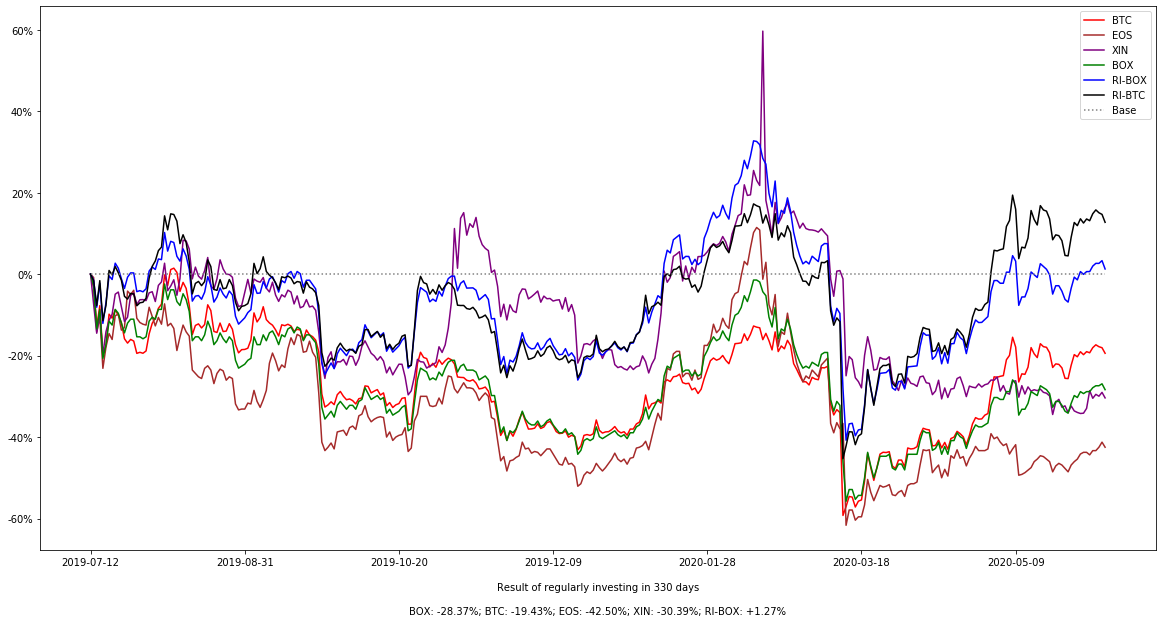

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
from re import sub

# "https://raw.githubusercontent.com/xiaolai/regular-investing-in-box/master/data/box_price_history.txt",
series = pd.read_csv(
    "/root/regular-investing-in-box/data/box_price_history.txt",
    sep="\t"
)

number_of_rows = series.shape[0]

daily_invested = 1

# add column "Total Invested"
total_invested = []
for i in range(0, number_of_rows):
    total_invested.append((i+1)*daily_invested)
series["Total Invested"] = total_invested

# add column "Daily Bought"
BOX_daily_bought = []
for i in range(0, number_of_rows):
    BOX_daily_bought.append(daily_invested/float(sub(r"[^\d.]", "", series.at[i, "BOX Price"])))

series["BOX Bought"] = BOX_daily_bought

# add column "BOX Value Accumulated"
BOX_value_accumulated = []
for i in range(0, number_of_rows):
    holding = 0
    for j in range(0, i+1):
        holding += series.at[j, "BOX Bought"]
    BOX_value_accumulated.append(holding * float(sub(r"[^\d.]", "", series.at[i, "BOX Price"])))
series["BOX Value Accumulated"] = BOX_value_accumulated    

# add column "BTC Daily Bought"
BTC_daily_bought = []
for i in range(0, number_of_rows):
    BTC_daily_bought.append(daily_invested/float(sub(r"[^\d.]", "", series.at[i, "BTC Price"])))

series["BTC Bought"] = BTC_daily_bought

# add column "BTC Value Accumulated"
BTC_value_accumulated = []
for i in range(0, number_of_rows):
    holding = 0
    for j in range(0, i+1):
        holding += series.at[j, "BTC Bought"]
    BTC_value_accumulated.append(holding * float(sub(r"[^\d.]", "", series.at[i, "BTC Price"])))
series["BTC Value Accumulated"] = BTC_value_accumulated   


# add price changes of BTC, EOS, XIN, BOX, and RI-BOX
btc_price_change = []
eos_price_change = []
xin_price_change = []
box_price_change = []
ri_box_change = []
ri_btc_change = []
base = []

for i in range(0, number_of_rows):
    btc_price_change.append(float(sub(r"[^\d.]", "", series.at[i, "BTC Price"]))/float(sub(r"[^\d.]", "", series.at[0, "BTC Price"])) - 1)
    eos_price_change.append(float(sub(r"[^\d.]", "", series.at[i, "EOS Price"]))/float(sub(r"[^\d.]", "", series.at[0, "EOS Price"])) - 1)
    xin_price_change.append(float(sub(r"[^\d.]", "", series.at[i, "XIN Price"]))/float(sub(r"[^\d.]", "", series.at[0, "XIN Price"])) - 1)
    box_price_change.append(float(sub(r"[^\d.]", "", series.at[i, "BOX Price"]))/float(sub(r"[^\d.]", "", series.at[0, "BOX Price"])) - 1)    
    ri_box_change.append(series.at[i, "BOX Value Accumulated"]/series.at[i, "Total Invested"] - 1)
    ri_btc_change.append(series.at[i, "BTC Value Accumulated"]/series.at[i, "Total Invested"] - 1)
    
    base.append(0)

series["BTC"] = btc_price_change
series["EOS"] = eos_price_change
series["XIN"] = xin_price_change
series["BOX"] = box_price_change
series["RI-BOX"] = ri_box_change
series["RI-BTC"] = ri_btc_change
series["Base"] = base

pstring =  lambda i: ("+" if i[0] != '-' else "") + str(i)
BOX_Change = pstring("{0:.2%}".format(float(sub(r"[^\d.]", "", series.at[number_of_rows - 1, "BOX Price"]))/float(sub(r"[^\d.]", "", series.at[0, "BOX Price"])) - 1))
BTC_Change = pstring("{0:.2%}".format(float(sub(r"[^\d.]", "", series.at[number_of_rows - 1, "BTC Price"]))/float(sub(r"[^\d.]", "", series.at[0, "BTC Price"])) - 1))
EOS_Change = pstring("{0:.2%}".format(float(sub(r"[^\d.]", "", series.at[number_of_rows - 1, "EOS Price"]))/float(sub(r"[^\d.]", "", series.at[0, "EOS Price"])) - 1))
XIN_Change = pstring("{0:.2%}".format(float(sub(r"[^\d.]", "", series.at[number_of_rows - 1, "XIN Price"]))/float(sub(r"[^\d.]", "", series.at[0, "XIN Price"])) - 1))
RIBOX_Change = pstring("{0:.2%}".format(float(series.at[number_of_rows - 1, "BOX Value Accumulated"]/series.at[number_of_rows - 1, "Total Invested"] - 1)))

# draw the figure
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
series.plot(kind='line', x='Date', y='BTC', ax=ax, figsize = (20,10), color="red")
series.plot(kind='line', x='Date', y='EOS', ax=ax, figsize = (20,10), color="brown")
series.plot(kind='line', x='Date', y='XIN', ax=ax, figsize = (20,10), color="purple")
series.plot(kind='line', x='Date', y='BOX', ax=ax, figsize = (20,10), color="green")
series.plot(kind='line', x='Date', y='RI-BOX', ax=ax, figsize = (20,10), color="blue")
series.plot(kind='line', x='Date', y='RI-BTC', ax=ax, figsize = (20,10), color="black")
series.plot(kind='line', linestyle='dotted', x='Date', y='Base', ax=ax, figsize = (20,10), color="gray")
plt.xlabel(f'\nResult of regularly investing in {number_of_rows} days\n\nBOX: {BOX_Change}; BTC: {BTC_Change}; EOS: {EOS_Change}; XIN: {XIN_Change}; RI-BOX: {RIBOX_Change}')

# plt.show()
plt.savefig("box-historical-price-change.png", transparent=False)
plt.close()
